<a href="https://colab.research.google.com/github/jnsoliveira/Atividades/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINKS**

Github(Para visualização do código)
https://github.com/jnsoliveira/Atividades/blob/main/Kaggle_Titanic.ipynb


GoogleColab(Para executar o código, porém, é necessário fazer o upload dos arquivos 'test.csv' e 'train.csv' que se encontram em meu repositório do Github)
https://colab.research.google.com/github/jnsoliveira/Atividades/blob/main/Kaggle_Titanic.ipynb


Kaggle(Minha pontuação)
https://www.kaggle.com/jnsoliveira/competitions?tab=active

# **TAREFA**
Utilize o aprendizado de máquina para criar um modelo para prever quais passageiros sobreviveriam ao naufrágio do Titanic.

# **Titanic**
Sua construção começou em março de 1909 e seu lançamento ao mar ocorreu em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton com destino a Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville, na França, e por Queenstown, na Irlanda. Colidiu com um iceberg na proa dianteira do lado direito às 23h40 de 14 de abril, naufragando na madrugada do dia seguinte, com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história.

In [ ]:
#Bibliotecas que serão utilizadas

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Importando os dados | Fonte - https://www.kaggle.com/c/titanic/data

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [ ]:
#Verificar dimensões dos dataframes

train.shape
test.shape

(418, 11)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


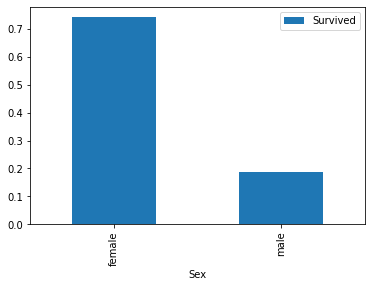

In [ ]:
#Verificar a coluna sexo

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

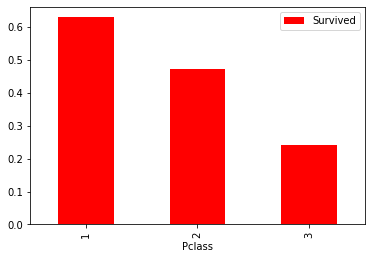

In [ ]:
#Verificar a coluna Pclass

class_pivot = train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar(color='r') #'r' indica a cor vermelha(red)
plt.show()

In [ ]:
#Verificar distribuição de idades

train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

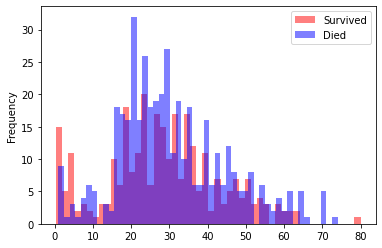

In [ ]:
#Criar histograma para visualização do grau de sobrevivência por idade

survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [ ]:
#Criar range fixos de idade para facilitar o algoritmo e tratar os missing values

def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

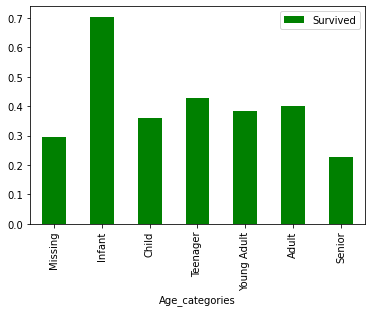

In [ ]:
#Sobrevivência entre as idades

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar(color='g')
plt.show()